In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_excel('cleandata.xlsx')

In [46]:
df

,Unnamed: 0,College_Name,State,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,0,"Dr. B R Ambedkar Institute of Technology, Port...",Andaman,12083.0,4780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Plastindia International University, Dadra & N...",Dadra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,K L University,Andhra pradesh,250000.0,145000.0,8.3,8.5,7.6,8.3,8.80,8.3,8.2
3,3,"Andhra University, College of Engineering",Andhra pradesh,10000.0,109000.0,7.7,8.2,6.9,7.8,8.00,7.2,7.9
4,4,Sri Venkateswara University College of Enginee...,Andhra pradesh,16395.0,31647.0,7.8,7.6,8.4,7.4,8.10,6.9,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...
727,727,"Techno India Salt Lake, Kolkata",West bengal,483800.0,273000.0,7.5,7.9,6.0,7.8,7.50,7.6,8.3
728,728,Bengal College of Engineering and Technology,West bengal,103600.0,112500.0,7.1,8.1,6.6,7.2,8.00,7.6,7.5
729,729,Dr. B.C. Roy Engineering College,West bengal,108980.0,119000.0,7.7,7.9,7.3,7.7,8.10,7.2,7.8
730,730,Bengal College of Engineering,West bengal,98500.0,112500.0,7.8,8.1,5.9,8.0,7.95,7.6,8.2


In [47]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [48]:
df[df.isnull().sum(1) > 1]

,College_Name,State,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,"Dr. B R Ambedkar Institute of Technology, Port...",Andaman,12083.0,4780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Plastindia International University, Dadra & N...",Dadra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,"Government Polytechnic, Daman",Daman,3575.0,8280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.sort_values(by = ['State'], inplace = True)

In [50]:
df.reset_index().drop(columns = ['index'], inplace = True)

# Problem Statement 1 : Understanding the Distribution of Fees

# 1.What is the average UG fee of engineering colleges across different states in India, 

In [53]:
avg_ug_fee = df.groupby('State')['UG_fee'].mean().dropna()
print("Average UG fee across states:")
print(avg_ug_fee)

Average UG fee across states:
State
Andaman               12083.000000
Andhra pradesh       114777.413793
Arunachal pradesh     46055.826667
Assam                 93041.880000
Bihar                 88499.333333
Chandigarh            73759.727273
Chhattisgarh          79681.296296
Daman                  3575.000000
Delhi ncr            151110.035714
Goa                   97918.928571
Gujarat              126630.800000
Haryana              139576.740741
Himachal pradesh     109291.642857
Jammu                 56053.482759
Jharkhand             81321.793103
Karnataka            185226.178571
Kerala                69092.633333
Madhya pradesh        96822.840000
Maharashtra          208684.133333
Manipur               98867.857143
Meghalaya            112677.600000
Mizoram               50952.000000
Nagaland              34538.500000
Orissa               171164.296296
Puducherry            51798.045455
Punjab               200347.153846
Rajasthan            131522.640000
Sikkim             

In [54]:
# which state has the median placement rating for engineering colleges
median_placement_state = df.loc[df['Placement'].median() == df['Placement'], 'State'].values[0]
print("State with median placement rating:", median_placement_state)

State with median placement rating: Andhra pradesh


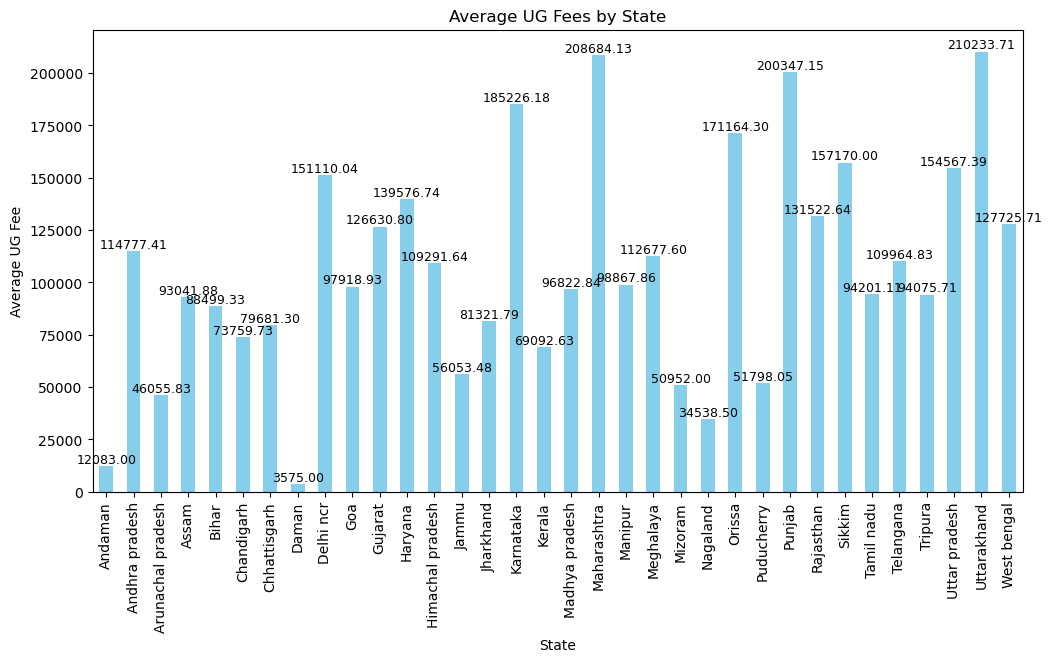

In [55]:
plt.figure(figsize=(12, 6))
bars = avg_ug_fee.plot(kind='bar', color='skyblue')

# Display values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Average UG Fees by State')
plt.ylabel('Average UG Fee')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()


# 2. What is the range of UG and PG fees (minimum and maximum values)?

In [57]:

ug_fee_range = (df['UG_fee'].min(), df['UG_fee'].max())
pg_fee_range = (df['PG_fee'].min(), df['PG_fee'].max())
print("UG fee range:", ug_fee_range)
print("PG fee range:", pg_fee_range)

UG fee range: (1500.0, 1604500.0)
PG fee range: (2130.0, 1270000.0)


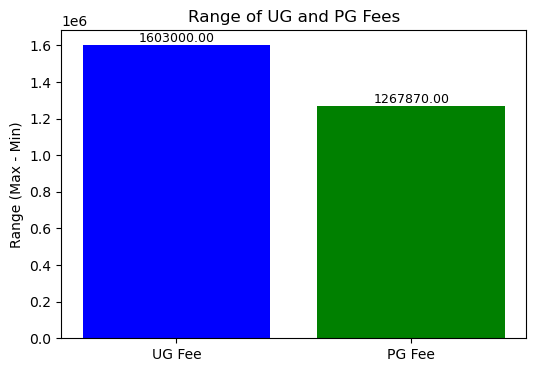

In [58]:
plt.figure(figsize=(6, 4))
bars = plt.bar(['UG Fee', 'PG Fee'], [ug_fee_range[1] - ug_fee_range[0], pg_fee_range[1] - pg_fee_range[0]], color=['blue', 'green'])

# Display values
for bar in bars:
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Range of UG and PG Fees')
plt.ylabel('Range (Max - Min)')
plt.show()


# 3. How are UG and PG fees distributed across the dataset (e.g., skewness, kurtosis)?

In [60]:
# 3 How are UG and PG fees distributed across the dataset (e.g., skewness, kurtosis)?
from scipy.stats import skew, kurtosis
ug_fee_skewness = skew(df['UG_fee'].dropna())
pg_fee_skewness = skew(df['PG_fee'].dropna())
ug_fee_kurtosis = kurtosis(df['UG_fee'].dropna())
pg_fee_kurtosis = kurtosis(df['PG_fee'].dropna())
print("UG fee skewness:", ug_fee_skewness)
print("PG fee skewness:", pg_fee_skewness)
print("UG fee kurtosis:", ug_fee_kurtosis)
print("PG fee kurtosis:", pg_fee_kurtosis)

UG fee skewness: 4.770646125293426
PG fee skewness: 7.804706154289817
UG fee kurtosis: 49.069661775655014
PG fee kurtosis: 114.05066759885423


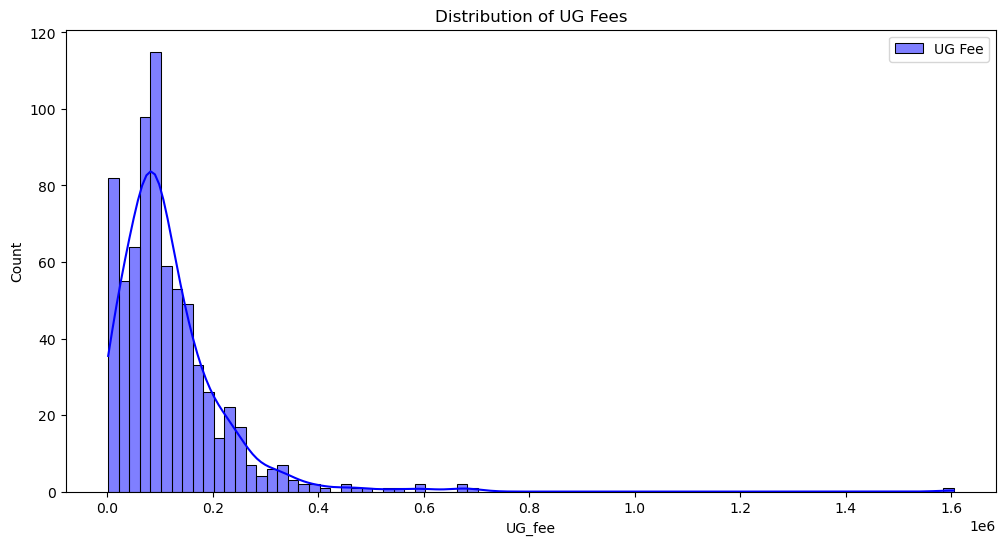

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df['UG_fee'], kde=True, color='blue', label='UG Fee')
plt.title('Distribution of UG Fees')
plt.legend()
plt.show()

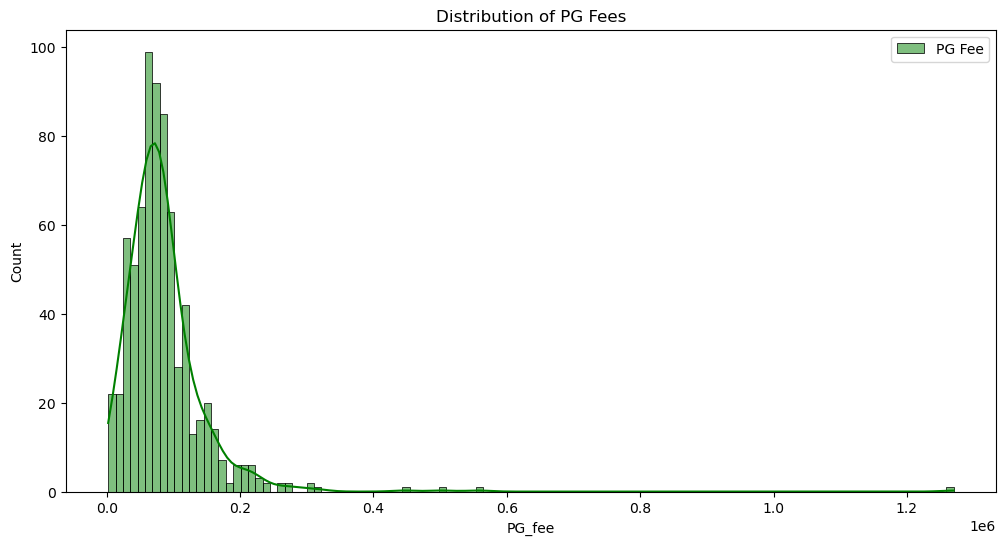

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PG_fee'], kde=True, color='green', label='PG Fee')
plt.title('Distribution of PG Fees')
plt.legend()
plt.show()

# 4. Are there significant outliers in UG and PG fees? If yes, which colleges are outliers?

In [64]:
Q1_UG, Q3_UG = np.percentile(df['UG_fee'].dropna(), [25, 75])
IQR_UG = Q3_UG - Q1_UG
LOWER_BOUND_UG = Q1_UG - 1.5 * IQR_UG
UPPER_BOUND_UG = Q3_UG + 1.5 * IQR_UG

Q1_PG, Q3_PG = np.percentile(df['PG_fee'].dropna(), [25, 75])
IQR_PG = Q3_PG - Q1_PG
LOWER_BOUND_PG = Q1_PG - 1.5 * IQR_PG
UPPER_BOUND_PG = Q3_PG + 1.5 * IQR_PG

UG_OUTLIERS = df[(df['UG_fee'] < LOWER_BOUND_UG) | (df['UG_fee'] > UPPER_BOUND_UG)]
PG_OUTLIERS = df[(df['PG_fee'] < LOWER_BOUND_PG) | (df['PG_fee'] > UPPER_BOUND_PG)]

print("UG Fee Outliers:")
print(UG_OUTLIERS[['College_Name', 'UG_fee']])

print("PG Fee Outliers:")
print(PG_OUTLIERS[['College_Name', 'PG_fee']])

UG Fee Outliers:
                                          College_Name     UG_fee
159                           Amity University, Noida    311000.0
186         Birla Institute of Technology and Science    399475.0
237                          IILM University, Gurgaon    330000.0
280                  National Institute of Technology    530000.0
360               Manipal Academy of Higher Education    335000.0
351        BMS Institute of Technology and Management    350000.0
346      Sri Jayachamarajendra College of Engineering    475000.0
338                   Manipal Institute of Technology    335000.0
350                                    PES University    340000.0
339                        R V College of Engineering    350000.0
438               Ramrao Adik Institute of Technology    325000.0
445  SVKM's Narsee Monjee Institute of Management S...   302000.0
436                        MIT World Peace University    310000.0
425      National Institute of Industrial Engineering    59

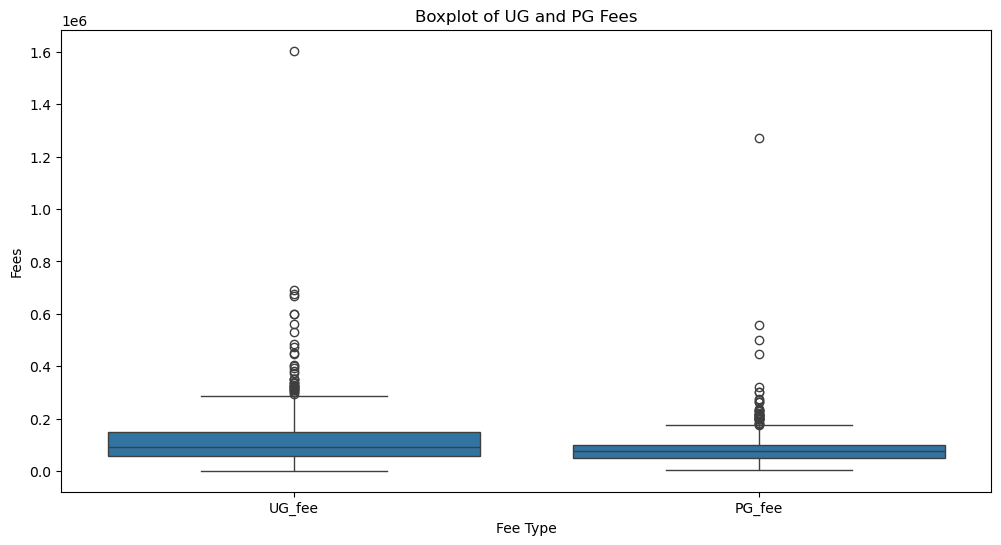

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['UG_fee', 'PG_fee']].melt(), x='variable', y='value')
plt.title('Boxplot of UG and PG Fees')
plt.ylabel('Fees')
plt.xlabel('Fee Type')
plt.show()

# 5 How do the top 10% of colleges in terms of fees compare to the bottom 10%?

In [67]:
ug_fee_sorted = df['UG_fee'].dropna().sort_values()
top_10_ug = ug_fee_sorted[ug_fee_sorted >= ug_fee_sorted.quantile(0.9)]
bottom_10_ug = ug_fee_sorted[ug_fee_sorted <= ug_fee_sorted.quantile(0.1)]

pg_fee_sorted = df['PG_fee'].dropna().sort_values()
top_10_pg = pg_fee_sorted[pg_fee_sorted >= pg_fee_sorted.quantile(0.9)]
bottom_10_pg = pg_fee_sorted[pg_fee_sorted <= pg_fee_sorted.quantile(0.1)]

print("Top 10% UG fees:")
print(top_10_ug)
print("Bottom 10% UG fees:")
print(bottom_10_ug)
print("Top 10% PG fees:")
print(top_10_pg)
print("Bottom 10% PG fees:")
print(bottom_10_pg)

Top 10% UG fees:
395     228700.0
342     229110.0
603     229500.0
185     229900.0
235     230000.0
         ...    
492     600000.0
540     666000.0
537     676000.0
548     690000.0
683    1604500.0
Name: UG_fee, Length: 74, dtype: float64
Bottom 10% UG fees:
467     1500.0
222     1500.0
303     2130.0
297     2130.0
306     2130.0
        ...   
462    16000.0
157    16150.0
720    16155.0
4      16395.0
16     16950.0
Name: UG_fee, Length: 74, dtype: float64
Top 10% PG fees:
485     150000.0
363     150000.0
718     150000.0
446     150000.0
618     150000.0
         ...    
208     320000.0
558     445475.0
430     501500.0
683     557250.0
548    1270000.0
Name: PG_fee, Length: 74, dtype: float64
Bottom 10% PG fees:
301     2130.0
294     2130.0
302     2130.0
283     2840.0
0       4780.0
        ...   
534    27500.0
225    27500.0
106    27500.0
70     27900.0
511    28400.0
Name: PG_fee, Length: 74, dtype: float64


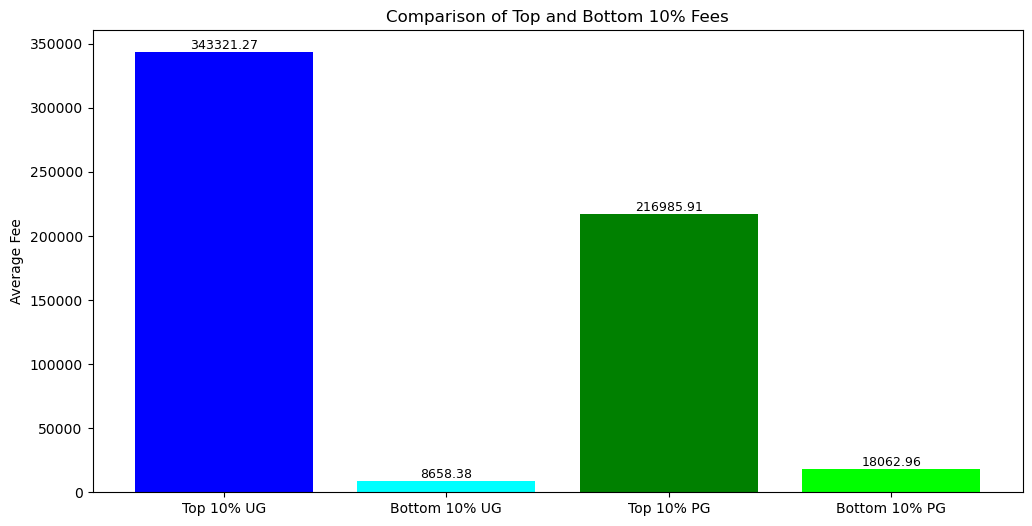

In [68]:
plt.figure(figsize=(12, 6))
bars = plt.bar(['Top 10% UG', 'Bottom 10% UG', 'Top 10% PG', 'Bottom 10% PG'],
               [top_10_ug.mean(), bottom_10_ug.mean(), top_10_pg.mean(), bottom_10_pg.mean()],
               color=['blue', 'cyan', 'green', 'lime'])

for bar in bars:
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Comparison of Top and Bottom 10% Fees')
plt.ylabel('Average Fee')

plt.show()

# 6. Are UG and PG fees correlated?

In [70]:
correlation_ug_pg = df[['UG_fee', 'PG_fee']].corr().iloc[0, 1]
print("Correlation between UG and PG fees:", correlation_ug_pg)

# or alternatiuve way
correlation = df['UG_fee'].corr(df['PG_fee'])
print(f"Pearson Correlation: {correlation:.2f}")


Correlation between UG and PG fees: 0.5929667324278237
Pearson Correlation: 0.59


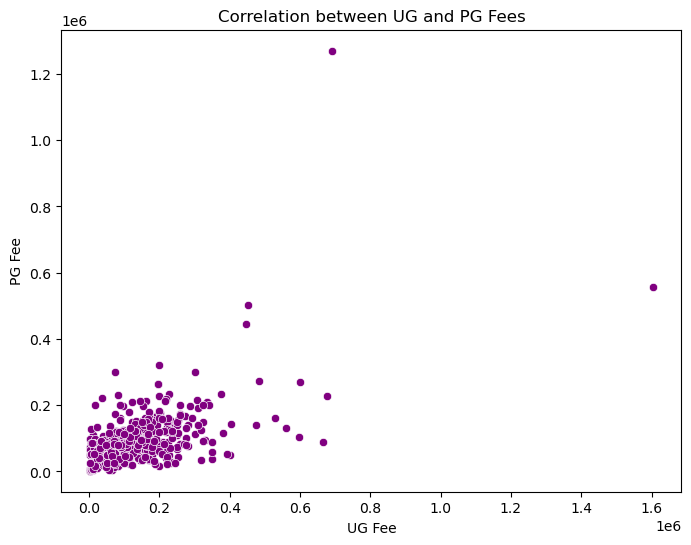

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='UG_fee', y='PG_fee', color='purple')
plt.title('Correlation between UG and PG Fees')
plt.xlabel('UG Fee')
plt.ylabel('PG Fee')
plt.show()

# 7. What are the fee ranges for colleges in different states?

In [73]:
state_fee_ranges = df.groupby('State').agg({'UG_fee': ['min', 'max'], 'PG_fee': ['min', 'max']})
print("State-wise fee ranges:")
print(state_fee_ranges)

State-wise fee ranges:
                    UG_fee              PG_fee           
                       min        max      min        max
State                                                    
Andaman            12083.0    12083.0   4780.0     4780.0
Andhra pradesh     10000.0   280000.0  29500.0   145000.0
Arunachal pradesh  10000.0   145600.0  16800.0   100000.0
Assam               2130.0   225000.0  27900.0   149000.0
Bihar               2630.0   165700.0  22230.0   117600.0
Chandigarh          7225.0   160000.0   7225.0    93500.0
Chhattisgarh       12725.0   180150.0  30000.0   121000.0
Dadra                  NaN        NaN      NaN        NaN
Daman               3575.0     3575.0   8280.0     8280.0
Delhi ncr          16150.0   311000.0   8970.0   213000.0
Goa                14000.0   399475.0  14000.0    89400.0
Gujarat             1500.0   258500.0   5730.0   320000.0
Haryana            40000.0   330000.0  16160.0   167250.0
Himachal pradesh   55000.0   201400.0  34050.0   

<Figure size 1200x800 with 0 Axes>

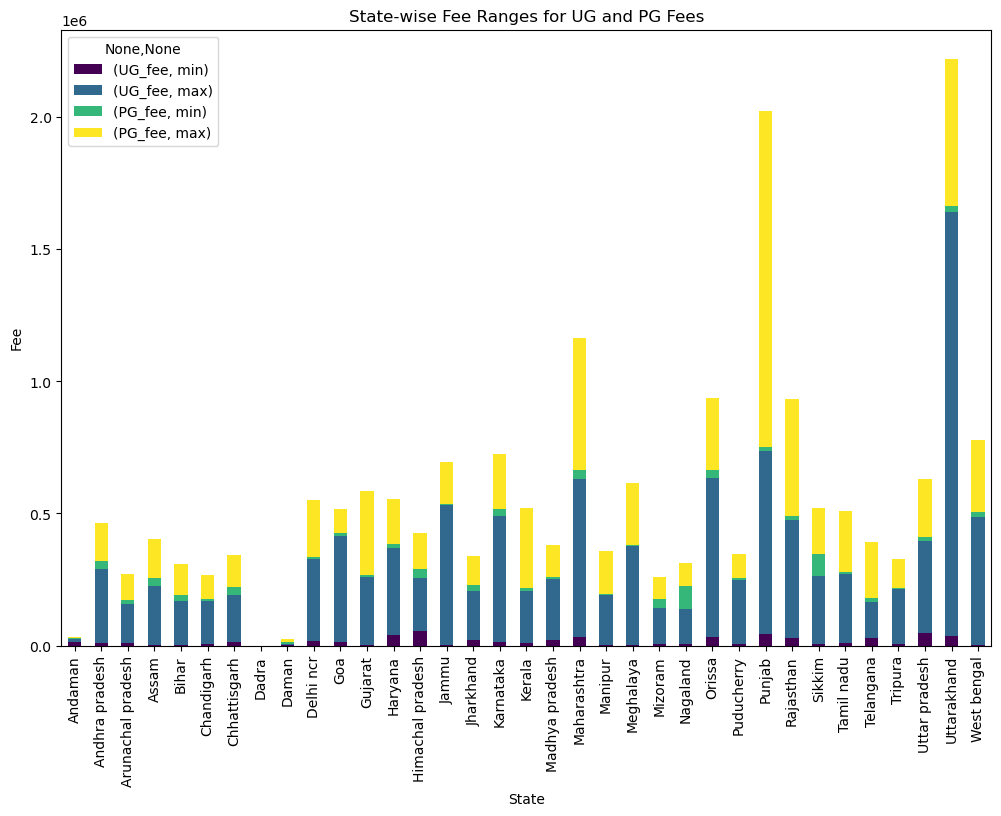

In [74]:
plt.figure(figsize=(12, 8))
state_fee_ranges.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='viridis')
plt.title('State-wise Fee Ranges for UG and PG Fees')
plt.ylabel('Fee')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()


<Figure size 1600x1000 with 0 Axes>

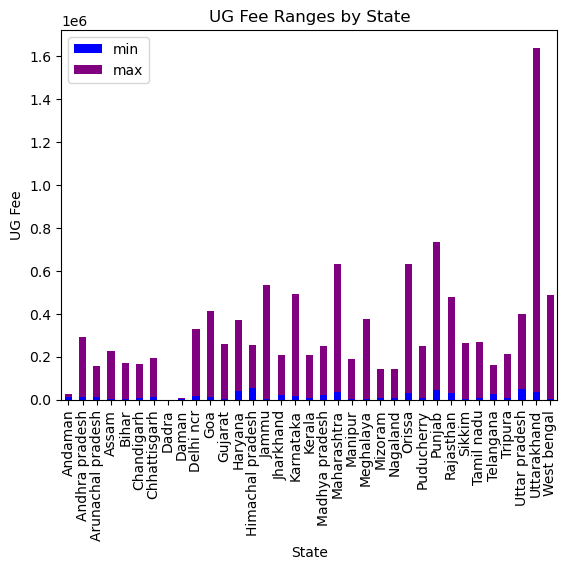

In [75]:
# Plotting UG fees for each state
plt.figure(figsize=(16, 10))
colors = ['blue', 'Purple']
state_fee_ranges['UG_fee'].plot(kind='bar', color=colors, stacked=True)
plt.title('UG Fee Ranges by State')
plt.xlabel('State')
plt.ylabel('UG Fee')
plt.xticks(rotation=90)
plt.show()

<Figure size 1600x1000 with 0 Axes>

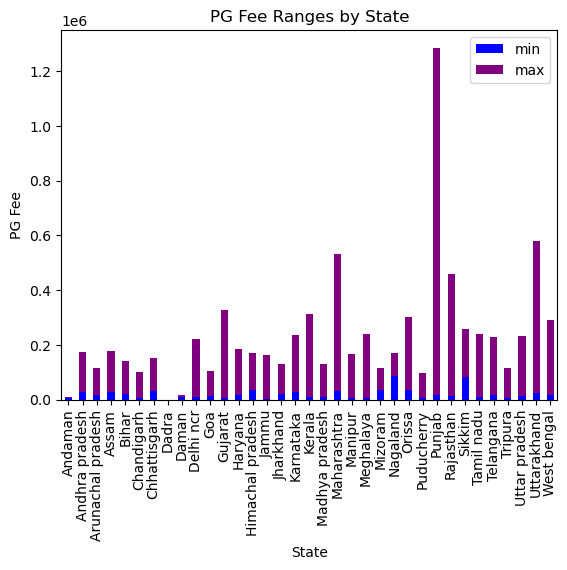

In [76]:
# Plotting PG fees for each state
plt.figure(figsize=(16, 10))
colors = ['blue', 'Purple']
state_fee_ranges['PG_fee'].plot(kind='bar', color=colors, stacked=True)
plt.title('PG Fee Ranges by State')
plt.xlabel('State')
plt.ylabel('PG Fee')
plt.xticks(rotation=90)
plt.show()

# Problem Statement 2 : Evaluating Ratings Distribution

# 1 .What is the mean, median, and standard deviation for each rating type (Overall, Academic, etc.)?


In [79]:
rating_columns = ['Rating', 'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement', 'Social_Life']
descriptive_stats = df[rating_columns].agg(['mean', 'median', 'std'])
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
           Rating  Academic  Accommodation   Faculty  Infrastructure  \
mean    7.758093  8.052369       7.284401  7.915947        7.956182   
median  7.800000  8.100000       7.400000  8.000000        8.000000   
std     0.654203  0.583659       0.809138  0.593114        0.764054   

        Placement  Social_Life  
mean     7.381390     7.892920  
median   7.600000     8.000000  
std      1.062997     0.732473  


<Figure size 900x600 with 0 Axes>

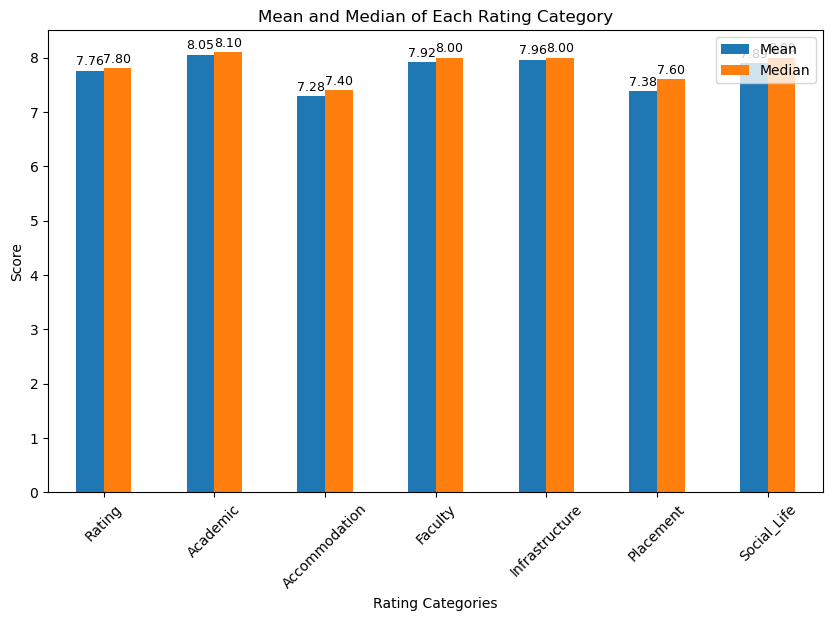

In [80]:
plt.figure(figsize=(9, 6))
bars = descriptive_stats.T[['mean', 'median']].plot(kind='bar', figsize=(10, 6))

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Mean and Median of Each Rating Category')
plt.ylabel('Score')
plt.xlabel('Rating Categories')
plt.xticks(rotation=45)
plt.legend(['Mean', 'Median'])
plt.show()

# 2. How are the ratings distributed (e.g., normal, skewed, etc.)?


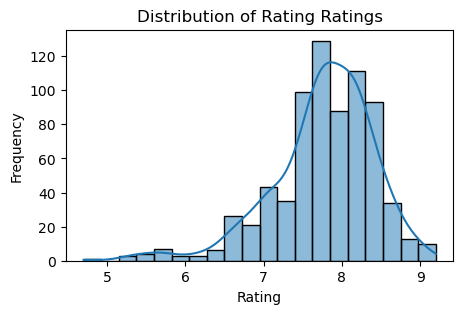

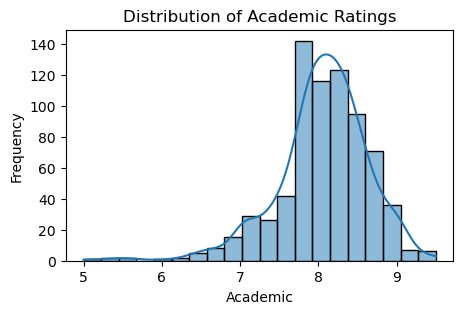

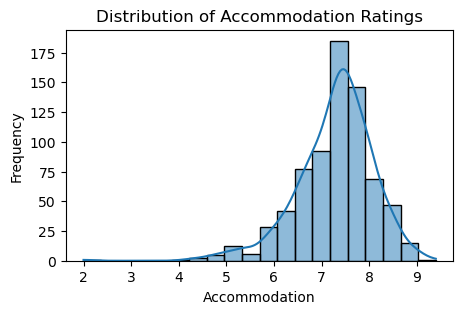

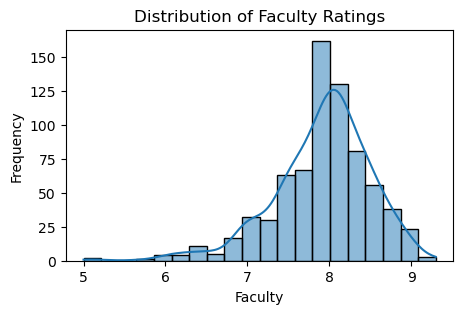

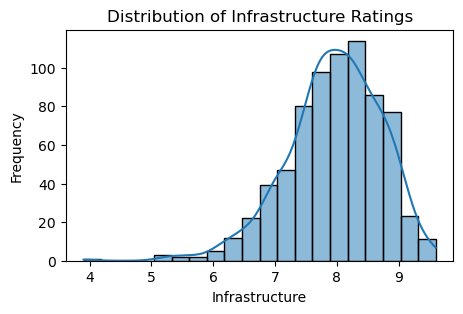

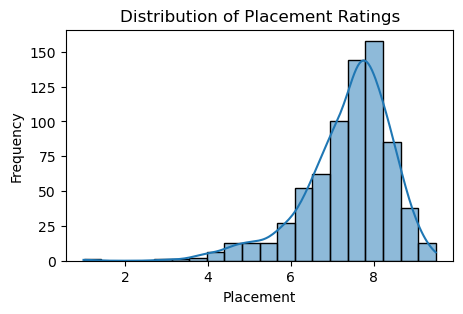

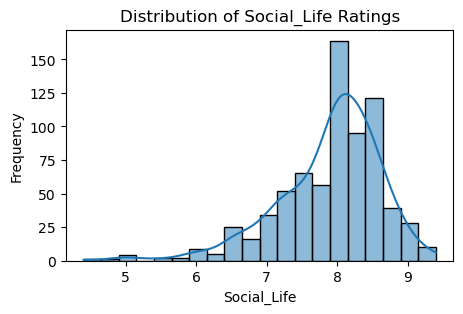

In [82]:
for col in rating_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {col} Ratings')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# alternate way

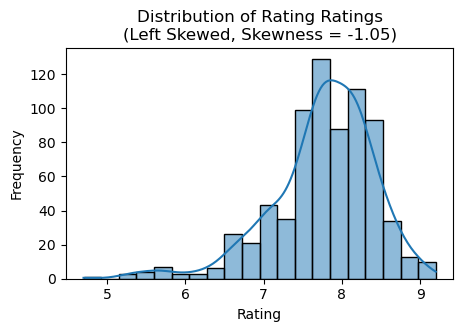

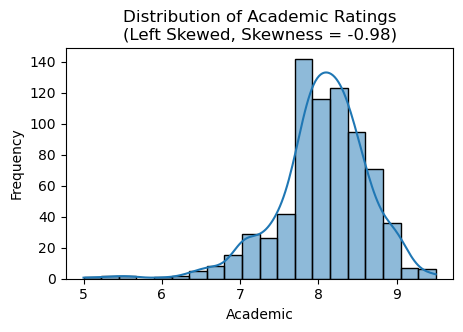

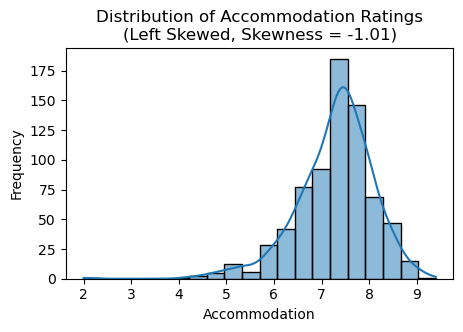

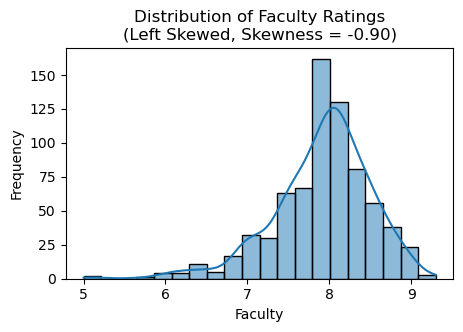

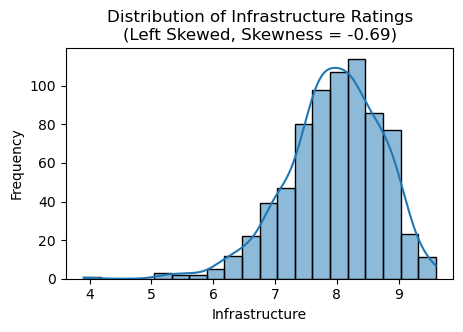

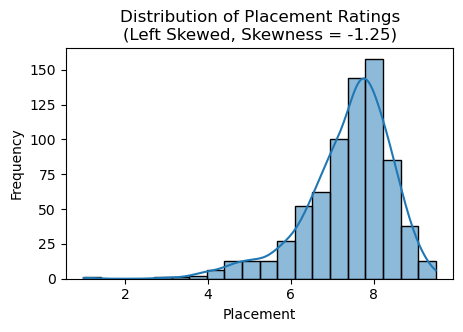

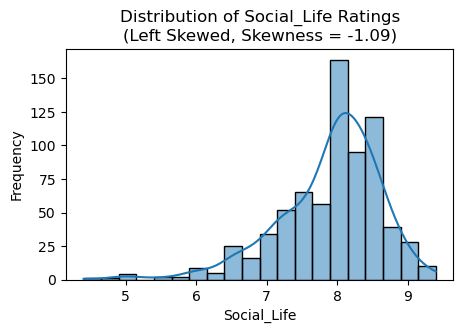

In [84]:
for col in rating_columns:
    plt.figure(figsize=(5, 3))
    
    data = df[col].dropna()
    
    skewness = skew(data)
    
    if skewness > 0.5:
        skew_type = 'Right Skewed'
    elif skewness < -0.5:
        skew_type = 'Left Skewed'
    else:
        skew_type = 'Approximately Normal'
    
    sns.histplot(data, kde=True, bins=20)
    plt.title(f'Distribution of {col} Ratings\n({skew_type}, Skewness = {skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.show()


# 3. Are there outliers in any rating categories? 


In [86]:
# outliers = {}
# for col in rating_columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][['College_Name', col]]

In [87]:
# outliers = {}
# for col in rating_columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

#     outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][['College_Name', col]]
#     print(f"Outliers in {col}: {outliers[col]}")


In [88]:
outliers = {}
for col in rating_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers[col].empty:
        print(f"Outliers present in {col}.")
    else:
        print(f"No outliers in {col}.")

Outliers present in Rating.
Outliers present in Academic.
Outliers present in Accommodation.
Outliers present in Faculty.
Outliers present in Infrastructure.
Outliers present in Placement.
Outliers present in Social_Life.


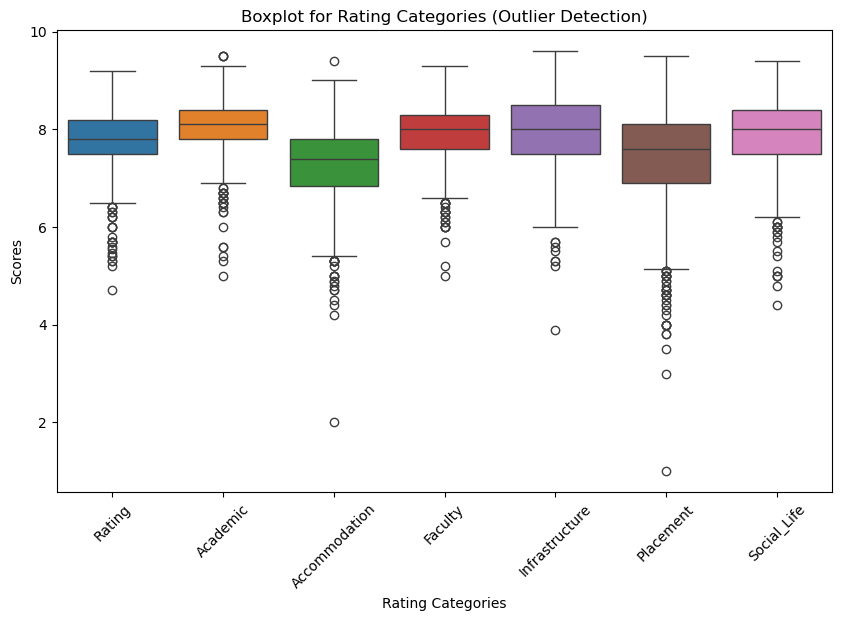

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[rating_columns])
plt.title('Boxplot for Rating Categories (Outlier Detection)')
plt.ylabel('Scores')
plt.xlabel('Rating Categories')
plt.xticks(rotation=45)
plt.show()

# 4. Which colleges are they?


In [91]:
for col, data in outliers.items():
    print(f"Outliers in {col}:")
    print(data)

Outliers in Rating:
                                          College_Name             State  \
62                   Barak Valley Engineering College              Assam   
65         Royal School of Engineering and Technology              Assam   
58         Jorhat Institute of Science and Technology              Assam   
102                 Sitamarhi Institute of Technology              Bihar   
104  Maulana Azad College of Engineering and Techno...             Bihar   
278     Mahatma Gandhi Government Engineering College   Himachal pradesh   
272  LR Institute of Engineering and Technology, So...  Himachal pradesh   
274                           Manav Bharti University   Himachal pradesh   
265            Green Hills Engineering College, Solan   Himachal pradesh   
285  Yogananda College of Engineering & Technology ...             Jammu   
282  Government College of Engineering and Technology              Jammu   
286  MBS College of Engineering and Technology, Jammu              J

# 5. What are the highest and lowest-rated colleges for each category?


In [93]:
highest_rated = df.loc[df[rating_columns].idxmax()]
lowest_rated = df.loc[df[rating_columns].idxmin()]
print("Highest Rated Colleges:\n", highest_rated[['College_Name'] + rating_columns])
print("Lowest Rated Colleges:\n", lowest_rated[['College_Name'] + rating_columns])

Highest Rated Colleges:
                                           College_Name  Rating  Academic  \
189  National Centre for Antarctic and Ocean Research      9.2       9.0   
191                National Institute of Oceanography      8.8       9.5   
320                          Netaji Subhas University      9.0       9.5   
416                       Avantika University, Ujjain      9.1       9.3   
171                             Shiv Nadar University      9.0       8.8   
416                       Avantika University, Ujjain      9.1       9.3   
221                     P.P. Savani University, Surat      8.1       8.3   

     Accommodation  Faculty  Infrastructure  Placement  Social_Life  
189            9.0     8.00        7.622222   7.744444     7.955556  
191            8.8     8.90        9.300000   8.300000     8.200000  
320            9.4     8.70        9.200000   8.500000     8.700000  
416            8.5     9.30        8.500000   9.500000     9.200000  
171            7

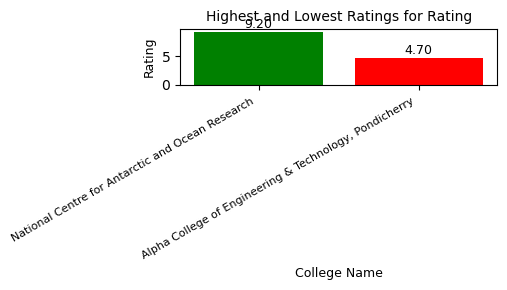

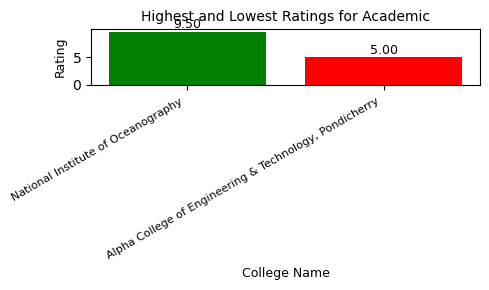

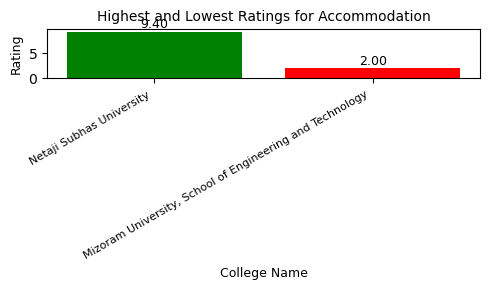

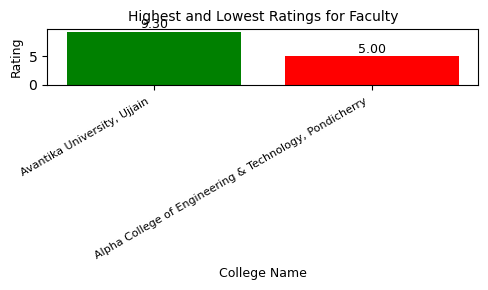

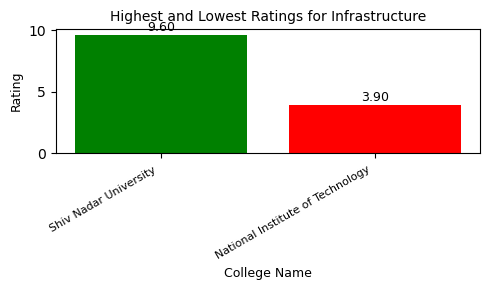

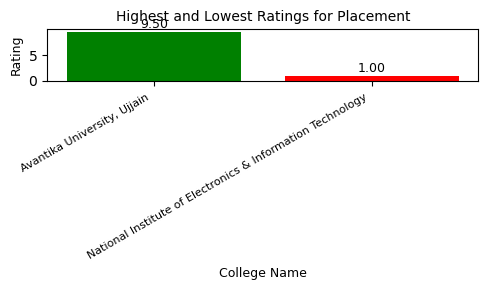

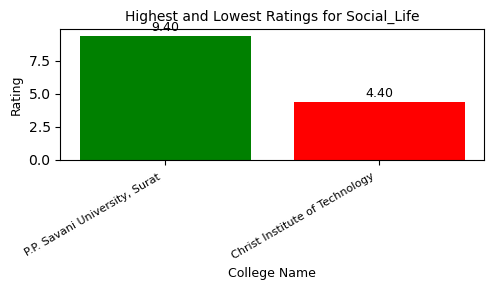

In [94]:
for col in rating_columns:
    # Get the index of the highest and lowest ratings
    highest_idx = df[col].idxmax()
    lowest_idx = df[col].idxmin()

    # Extract  college names, ratings
    highest_college = df.loc[highest_idx, 'College_Name']
    highest_value = df.loc[highest_idx, col]

    lowest_college = df.loc[lowest_idx, 'College_Name']
    lowest_value = df.loc[lowest_idx, col]

    plt.figure(figsize=(5, 3))  
    bars = plt.bar([highest_college, lowest_college], [highest_value, lowest_value], color=['green', 'red'])

    # Display values on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=9)

    # Title and labels
    plt.title(f'Highest and Lowest Ratings for {col}', fontsize=10)
    plt.ylabel('Rating', fontsize=9)
    plt.xlabel('College Name', fontsize=9)
    plt.xticks(rotation=30, ha='right', fontsize=8)
    plt.tight_layout()  
    plt.show()


# 6. Are there correlations between specific rating categories (e.g., Faculty and Placement)?


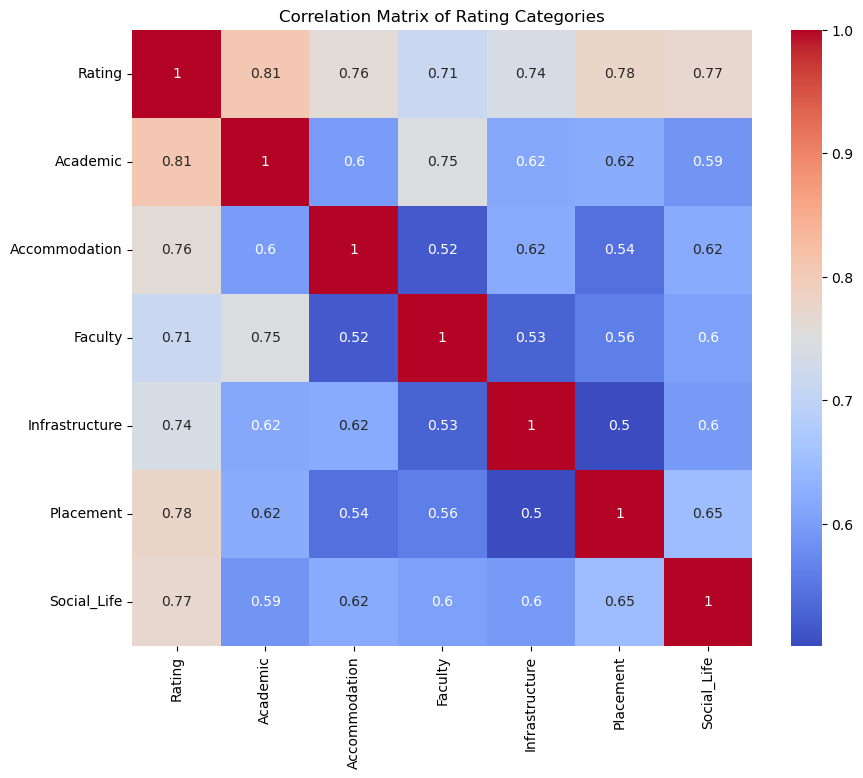

In [96]:
correlations = df[rating_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Rating Categories')
plt.show()

# 7. Are certain states consistently rated higher or lower across multiple categories?


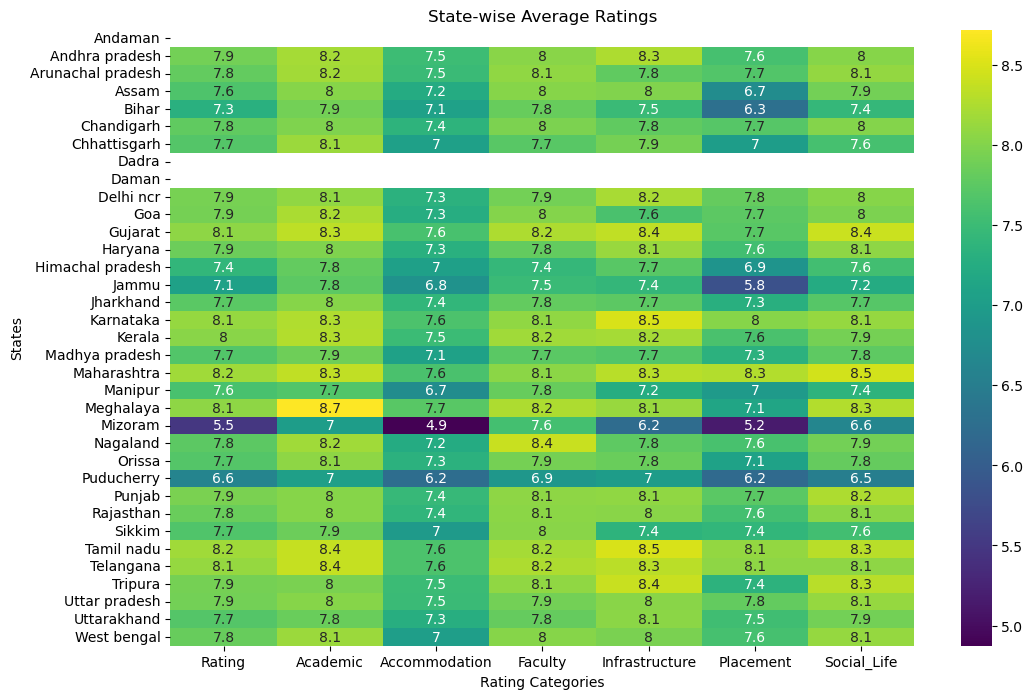

In [98]:
# 7
state_avg_ratings = df.groupby('State')[rating_columns].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(state_avg_ratings, annot=True, cmap='viridis')
plt.title('State-wise Average Ratings')
plt.xlabel('Rating Categories')
plt.ylabel('States')
plt.show()

# 8. What percentage of colleges achieve an overall rating above 8.


In [100]:
high_rated_percentage = (df['Rating'] > 8).sum() / df['Rating'].count() * 100
print(f"Percentage of colleges with overall rating above 8: {high_rated_percentage:.2f}%")

Percentage of colleges with overall rating above 8: 35.80%


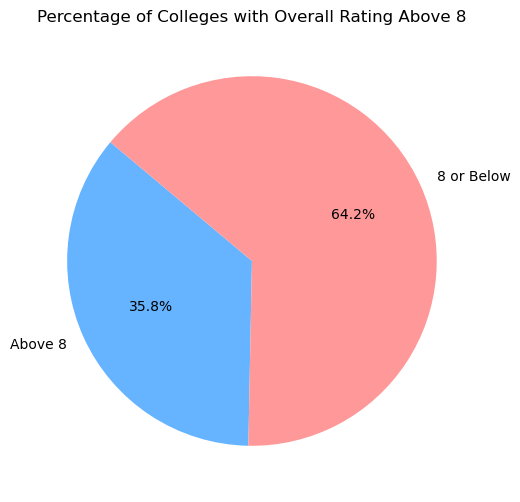

In [154]:
plt.figure(figsize=(6, 6))
labels = ['Above 8', '8 or Below']
sizes = [(df['Rating'] > 8).sum(), (df['Rating'] <= 8).sum()]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Colleges with Overall Rating Above 8')
plt.show()